<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt # Matplotlib is Pythons main plotting library but there are many.
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
import matplotlib.gridspec as gridspec

# Data Visualization and Story Telling

One of the main goals with data visualizations is to show data and tell a story. Within such a story you may want to let the data speak for itself or guide a reader to a specific conclusion. There are many examples of good data and corresponding visualizations. The files included in the folder "article_commentary" provide examples on the power of data visualization as well as some of the challenges that you may encounter. Part of the art of creating compelling visualizations is also knowing which type of visualization to use.

When plotting data there are various libraries that can be utilized. MatPlotLib is the main plotting library in Python. OTher libraries include Seaborn, Plotly and Bokeh each with specific advantages and their own learning curves. __Matplotlib__ is a comprehensive library for creating static, animated, and interactive visualizations in Python. __Seaborn__ is a Python visualization library based on MatPlotLib. It provides a high-level interface for drawing attractive statistical graphics. 
__Plotly__ and __Bokeh__ are interactive, open-source, and browser-based graphing libraries for Python.

Each library has their own documentation and example plots. It is good practice to get familiarized with the types of plots that each library has available. The following references include the plot gallery for each library:
- Python Graph Gallery: https://www.python-graph-gallery.com/
- Matplotlib Graph Gallery:
    - https://matplotlib.org/stable/gallery/index.html
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
- Seaborn (SNS): https://seaborn.pydata.org/examples/index.html
- Plotly: https://plotly.com/python/
- Bokeh: https://bokeh.org/

This Notebook provides an overview of basic plotting concepts using MatPlotLib. Most concepts are translatable to the other plotting libraries. When deciding what data features to plot, using the .hist(), sns.pairplots() and other functions will allow to quickly explore which numerical data features of a dataframe may be worth plotting. The value_counts(), groupby() and other functions will allow  to initially explore which categorical data may be worth plotting.

Documentation References:
- https://matplotlib.org/stable/index.html
- https://seaborn.pydata.org/
- https://plotly.com/python/
- https://bokeh.org/

Other Non-Python Plotting References: 
- JSD3 (Non-Python Visualization Library) https://observablehq.com/@d3/gallery

These references provide advanced examples that I find usefull when finding cretive ideas on how to use data visualization. In these refrences, the various authors are using different types of visualizations to tell a story. Note that becoming and expert on data visualization will require time and knowledge of many different libraries in order ot develop such expertise. The scope of the class is limited to introduction in data visualization topics.
- Five Thirty Eight (https://fivethirtyeight.com/): website that provides great examples on the capabilities of dashboards and data analytic visualizations on various topics.
- Information is Beautiful: https://informationisbeautiful.net/
- The Pudding https://pudding.cool/
- FlowingData | Data Visualization and Statistics: https://flowingdata.com/
- Countries Flag Stories: https://flagstories.co/
- Mapping Record-High Heat in U.S. Cities (pudding.cool): https://pudding.cool/projects/heat-records-map/
- The Rhythm of Food — by Google News Lab and Truth & Beauty (rhythm-of-food.net): https://rhythm-of-food.net/
- Americans Living Near Mass Shootings Statistics: https://www.cnn.com/interactive/2023/08/us/americans-living-near-mass-shootings-statistics-dg/

# Table of Contents
[MatPlotLib](#MatPlotLib)

[MatPlotLib: Example Data](#MatPlotLib:-Example-Data)

[MatPlotLib: Creating Figure Object Method 1: Explicit Interface](#MatPlotLib:-Creating-Figure-Object-Method-1:-Explicit-Interface)

[MatPlotLib: Creating Figure Object Method 2: Implicit Interface](#MatPlotLib:-Creating-Figure-Object-Method-2:-Implicit-Interface)

[MatPlotLib: Creating Figure Object Method 3: Data Object Interface](#MatPlotLib:-Creating-Figure-Object-Method-3:-Data-Object-Interface)

[Data Visualization Example: Flights Dataset](#Data-Visualization-Example:-Flights-Dataset)

- [Pandas .hist()](#Pandas-.hist())

- [SNS .pairplot()](#SNS-.pairplot())

- [SNS Plots](#SNS-Plots)

- [MatPlotLib Plots](#MatPlotLib-Plots)

- [Pandas Plots](#Pandas-Plots)

[MatPlotLib: Plt.show()](#MatPlotLib:-Plt.show())

[MatPlotLib: Colors (Optional)](#MatPlotLib:-Colors-(Optional))

[MatPlotLib: Styles-(Optional)](#MatPlotLib:-Styles-(Optional))

[MatPlotLib: Anatomy of a Figure](#MatPlotLib:-Anatomy-of-a-Figure)

[OPTIONAL: MatPlotLib: Subplots](#OPTIONAL:-MatPlotLib:-Subplots)

- [MatPlotLib: Subplots: Subplots Function](#MatPlotLib:-Subplots:-Subplots-Function)

- [MatPlotLib: Subplots: Add_suplots Function](#MatPlotLib:-Subplots:-Add_suplots-Function)

- [MatPlotLib: Subplots: Subplots.mosaic Function](#MatPlotLib:-Subplots:-Subplots.mosaic-Function)

- [MatPlotLib: Subplots: Gridspec and Add_subplot Functions](#MatPlotLib:-Subplots:-Gridspec-and-Add_subplot-Functions)

- [MatPlotLib: Subplots Examples](#MatPlotLib:-Subplots-Examples)

# MatPlotLib
[Return to Table of Contents](#Table-of-Contents)

The MatPlotLib library provides a canvas to draw a plot. Within the plot developer can define various parts and parameters within the figure including figure axes, styles, size, colors, labels, titles, annotations, legend, locations, type of plot, data to plot/draw, and more. 

There are various methods and functions that can be used to define a figure/plot. There is an explicit and implicit method, both of which can be used to create subplots.

Each method has its own advantages and disadvantages and are discussed below. There are other methods and variations of the methods discussed in this notebook. This section initially focuses on discussing creating blank figure/plot objects. Note that there may be a specific order in defining parameters. For example, figure size has to be specified before drawing the data.

The format and concepts used to create plots in MatPlotLib apply to some third-party visualization libraries (e.g., Seaborn, Plotly, Bokeh, etc.). Other libraries like Pandas may also use the MatPlotLib data object interface.  

Documentation References:
- Tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- MatplotLib Interfaces: https://matplotlib.org/stable/users/explain/figure/api_interfaces.html

# MatPlotLib: Example Data
[Return to Table of Contents](#Table-of-Contents)

In most cases when we use a plotting library we want to show relationships between data features. This may be numerical or categorical in nature and multi-dimensional (e.g., 2-D or 3-D). In majority of the cases we plot data in two dimensions were we want to show the relationship of one data feature to another. Most plotting libraries will accept list/array like data as input into the plotting function.

In [2]:
# Sample Data to be used for plot creation.
data_x1 = [1, 2, 3, 4]
data_y1 = [0, 0.5, 1, 0.2]

data_x2 = [4, 3, 2, 1]
data_y2 = [0, 0.5, 1, 0.2]

# MatPlotLib: Creating Figure Object Method 1: Explicit Interface
[Return to Table of Contents](#Table-of-Contents)

The explicit interface is the preferred method and uses the "Axes" to develop a plot and can be used to customize and fine-tune the plots. In this method a the interface is instatiated with is defining an instance of a figure (e.g., "plt.figure()" below). It also allows to use the subplot method to create an object on more than one axes. One advantage of this method is that it allows to call the figure in later code and also saving the figure.

Reference:
- https://matplotlib.org/stable/users/explain/figure/api_interfaces.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html

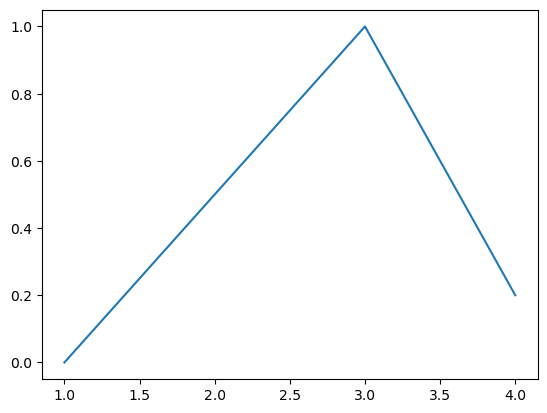

In [3]:
fig = plt.figure() # Defines the figure variable and figure instance.
ax = fig.subplots() # Defines teh axes.
ax.plot(data_x1, data_y1) # Plots the data.

#### Creating Subplots Object Method 1: Explicit Interface

This section uses the explicit interface with the subplots method as well as introduces other characteristics.

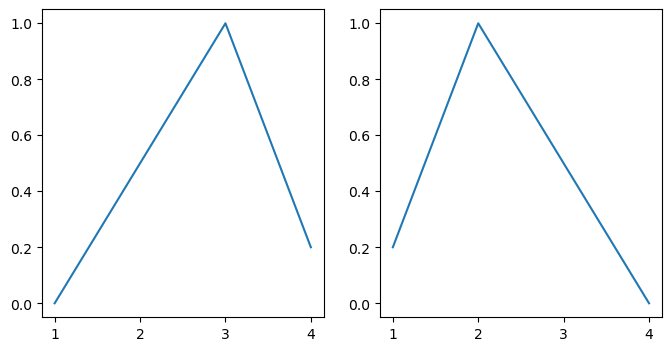

In [4]:
# Figure with two subplots funtion with figure size parameter.
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 4))  
# Each plotting function may have various parameters (e.g., figsize), 
# However, depending on the method the way that the parameter is changed (e.g, figure size) may vary.

axs[0].plot(data_x1, data_y1) # Index in axes for plot 1.
axs[1].plot(data_x2, data_y2) # Index in axes for plot 2.

Text(0, 0.5, 'y_data')

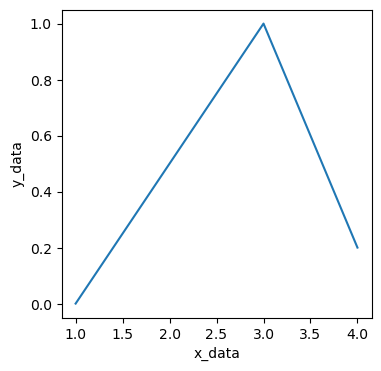

In [5]:
# Example data line plot with other parameters defined. 
fig, ax = plt.subplots(figsize = (4,4)) # With parameter fig size.
ax.plot(data_x1, data_y1)
ax.set_xlabel("x_data") # Setting the x-axis label
ax.set_ylabel("y_data") # Setting the y-axis label.
# plt.show();

Text(0, 0.5, 'y_data')

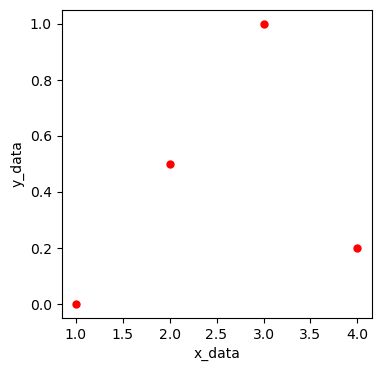

In [6]:
# Example data now with a scatter plot.
fig, ax = plt.subplots(figsize = (4,4))
ax.scatter(x = data_x1, y = data_y1, s = 100, c="red", marker='.')
ax.set_xlabel("x_data") 
ax.set_ylabel("y_data") 
# plt.show();

# MatPlotLib: Creating Figure Object Method 2: Implicit Interface
[Return to Table of Contents](#Table-of-Contents)

In the implicit interface initial funciton uses the plot function to instantiate the figure. In this interface the figure and axes are created for the user.

References:
- https://matplotlib.org/stable/users/explain/figure/api_interfaces.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

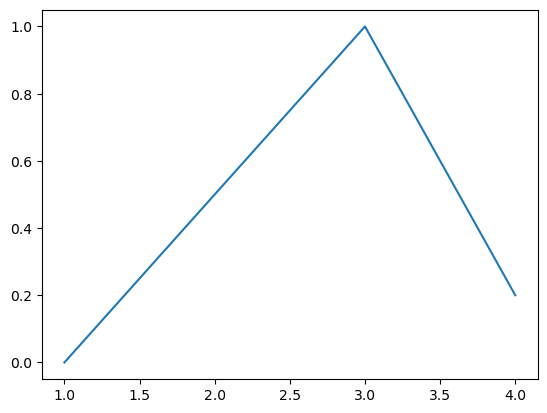

In [7]:
#plt.figure(figsize=(4,4)) # Some parameters like Figure size need to be defined before the plot.
plt.plot(data_x1, data_y1); # Defines blank plot. If plt.figure(figsize=(4,4)) is defined after will not work.

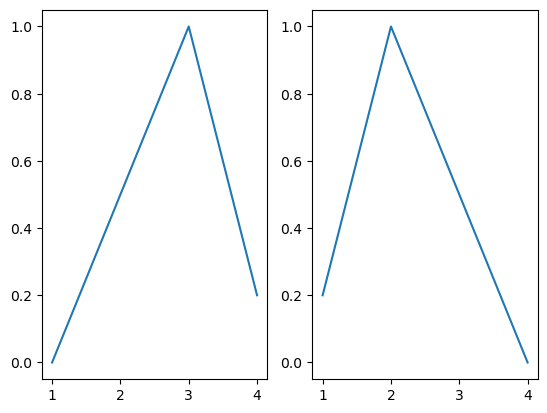

In [8]:
plt.subplot(1, 2, 1) # Defines the nrow, ncol, and plot index
plt.plot(data_x1, data_y1)

plt.subplot(1, 2, 2) # Defines the nrow, ncol, and plot index
plt.plot(data_x2, data_y2)

# MatPlotLib: Creating Figure Object Method 3: Data Object Interface
[Return to Table of Contents](#Table-of-Contents)

Some third party libraries (e.g., Pandas) have chosen to use a MatPlotLib in the backend for plotting the data objects 

References:
- https://matplotlib.org/stable/users/explain/figure/api_interfaces.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Common Plots:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html

In [9]:
df = pd.DataFrame(data = list(zip(data_x1, data_y1)), columns=['x1', 'y1'])
df

,x1,y1
0,1,0.0
1,2,0.5
2,3,1.0
3,4,0.2


<Axes: title={'center': 'My plot'}>

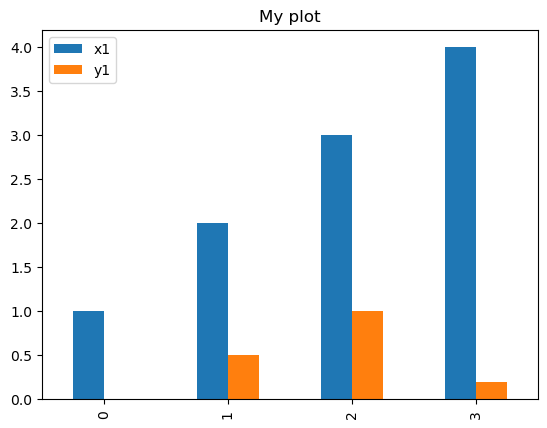

In [10]:
df.plot(kind = 'bar', title="My plot") # Note that this method uses the index as the x-axis.

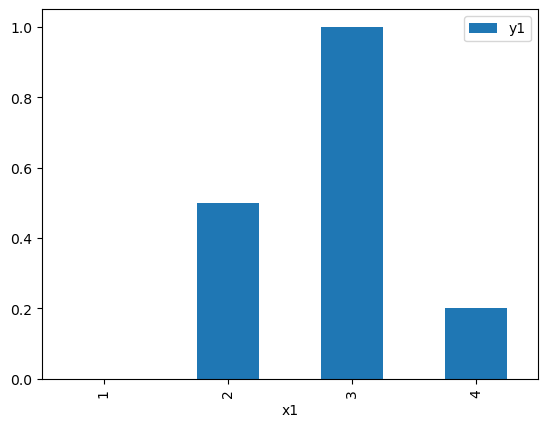

In [11]:
# This method specifies the type of plot as a function and the x's and y's data as parameters.
ax = df.plot.bar(x='x1', y='y1')

# Data Visualization Example: Flights Dataset
[Return to Table of Contents](#Table-of-Contents)

This example data uses the  airline industry dataset that was cleaned in a previous notebook.

In [12]:
# Data Example: To be used in later examples.
df_flights = pd.read_csv('https://raw.githubusercontent.com/fgonzaleumbc/DATA601/main/Lecture06/output_data/nyc_flights_small_cleaned.csv')

In [13]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258944 entries, 0 to 258943
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           258944 non-null  int64  
 1   day             258944 non-null  int64  
 2   dep_time        258944 non-null  float64
 3   sched_dep_time  258944 non-null  int64  
 4   dep_delay       258944 non-null  float64
 5   arr_time        258944 non-null  float64
 6   sched_arr_time  258944 non-null  int64  
 7   arr_delay       258944 non-null  float64
 8   carrier         258944 non-null  object 
 9   origin          258944 non-null  object 
 10  dest            258944 non-null  object 
 11  air_time        258944 non-null  float64
 12  distance        258944 non-null  int64  
 13  hour            258944 non-null  int64  
 14  minute          258944 non-null  int64  
 15  time_hour       258944 non-null  object 
dtypes: float64(5), int64(7), object(4)
memory usage: 31.6+ M

Recall exploring the outputs of .hist(), sns.pairplot(), value_counts(), groupby() and other functions may allow us to identy which data features may be worth exploring and plotting individually.

### Pandas .hist()
[Return to Table of Contents](#Table-of-Contents)

The pandas .hist() function allows exploring the distribution of the data very quickly. Besides using the function for identifying issues to resolve in the data cleaning, this function can be used to identify important features to plot. Histogram documentation at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

CPU times: total: 156 ms
Wall time: 219 ms


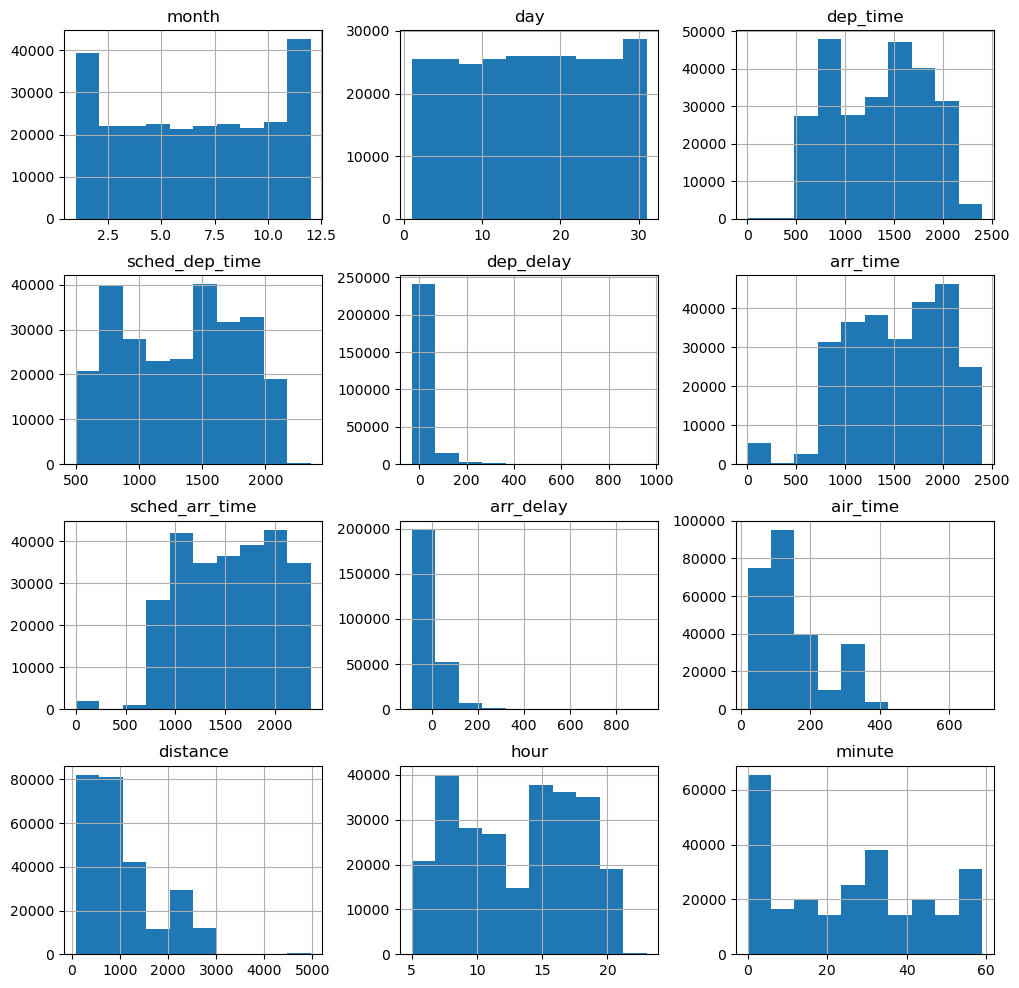

In [14]:
%%time
# The .hist() or histogram function shows the distribution for eadh of the numerical features.
# X-axis is the values in the feature and y-axis is how many or the counts.
df_flights.hist(figsize = [12, 12]);

### SNS .pairplot()
[Return to Table of Contents](#Table-of-Contents)

The SNS pairplot allows to explore the scatter plots of all combination of two numerical features. SNS Pairplot documentation at: https://seaborn.pydata.org/generated/seaborn.pairplot.html

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


CPU times: total: 12.1 s
Wall time: 12.4 s


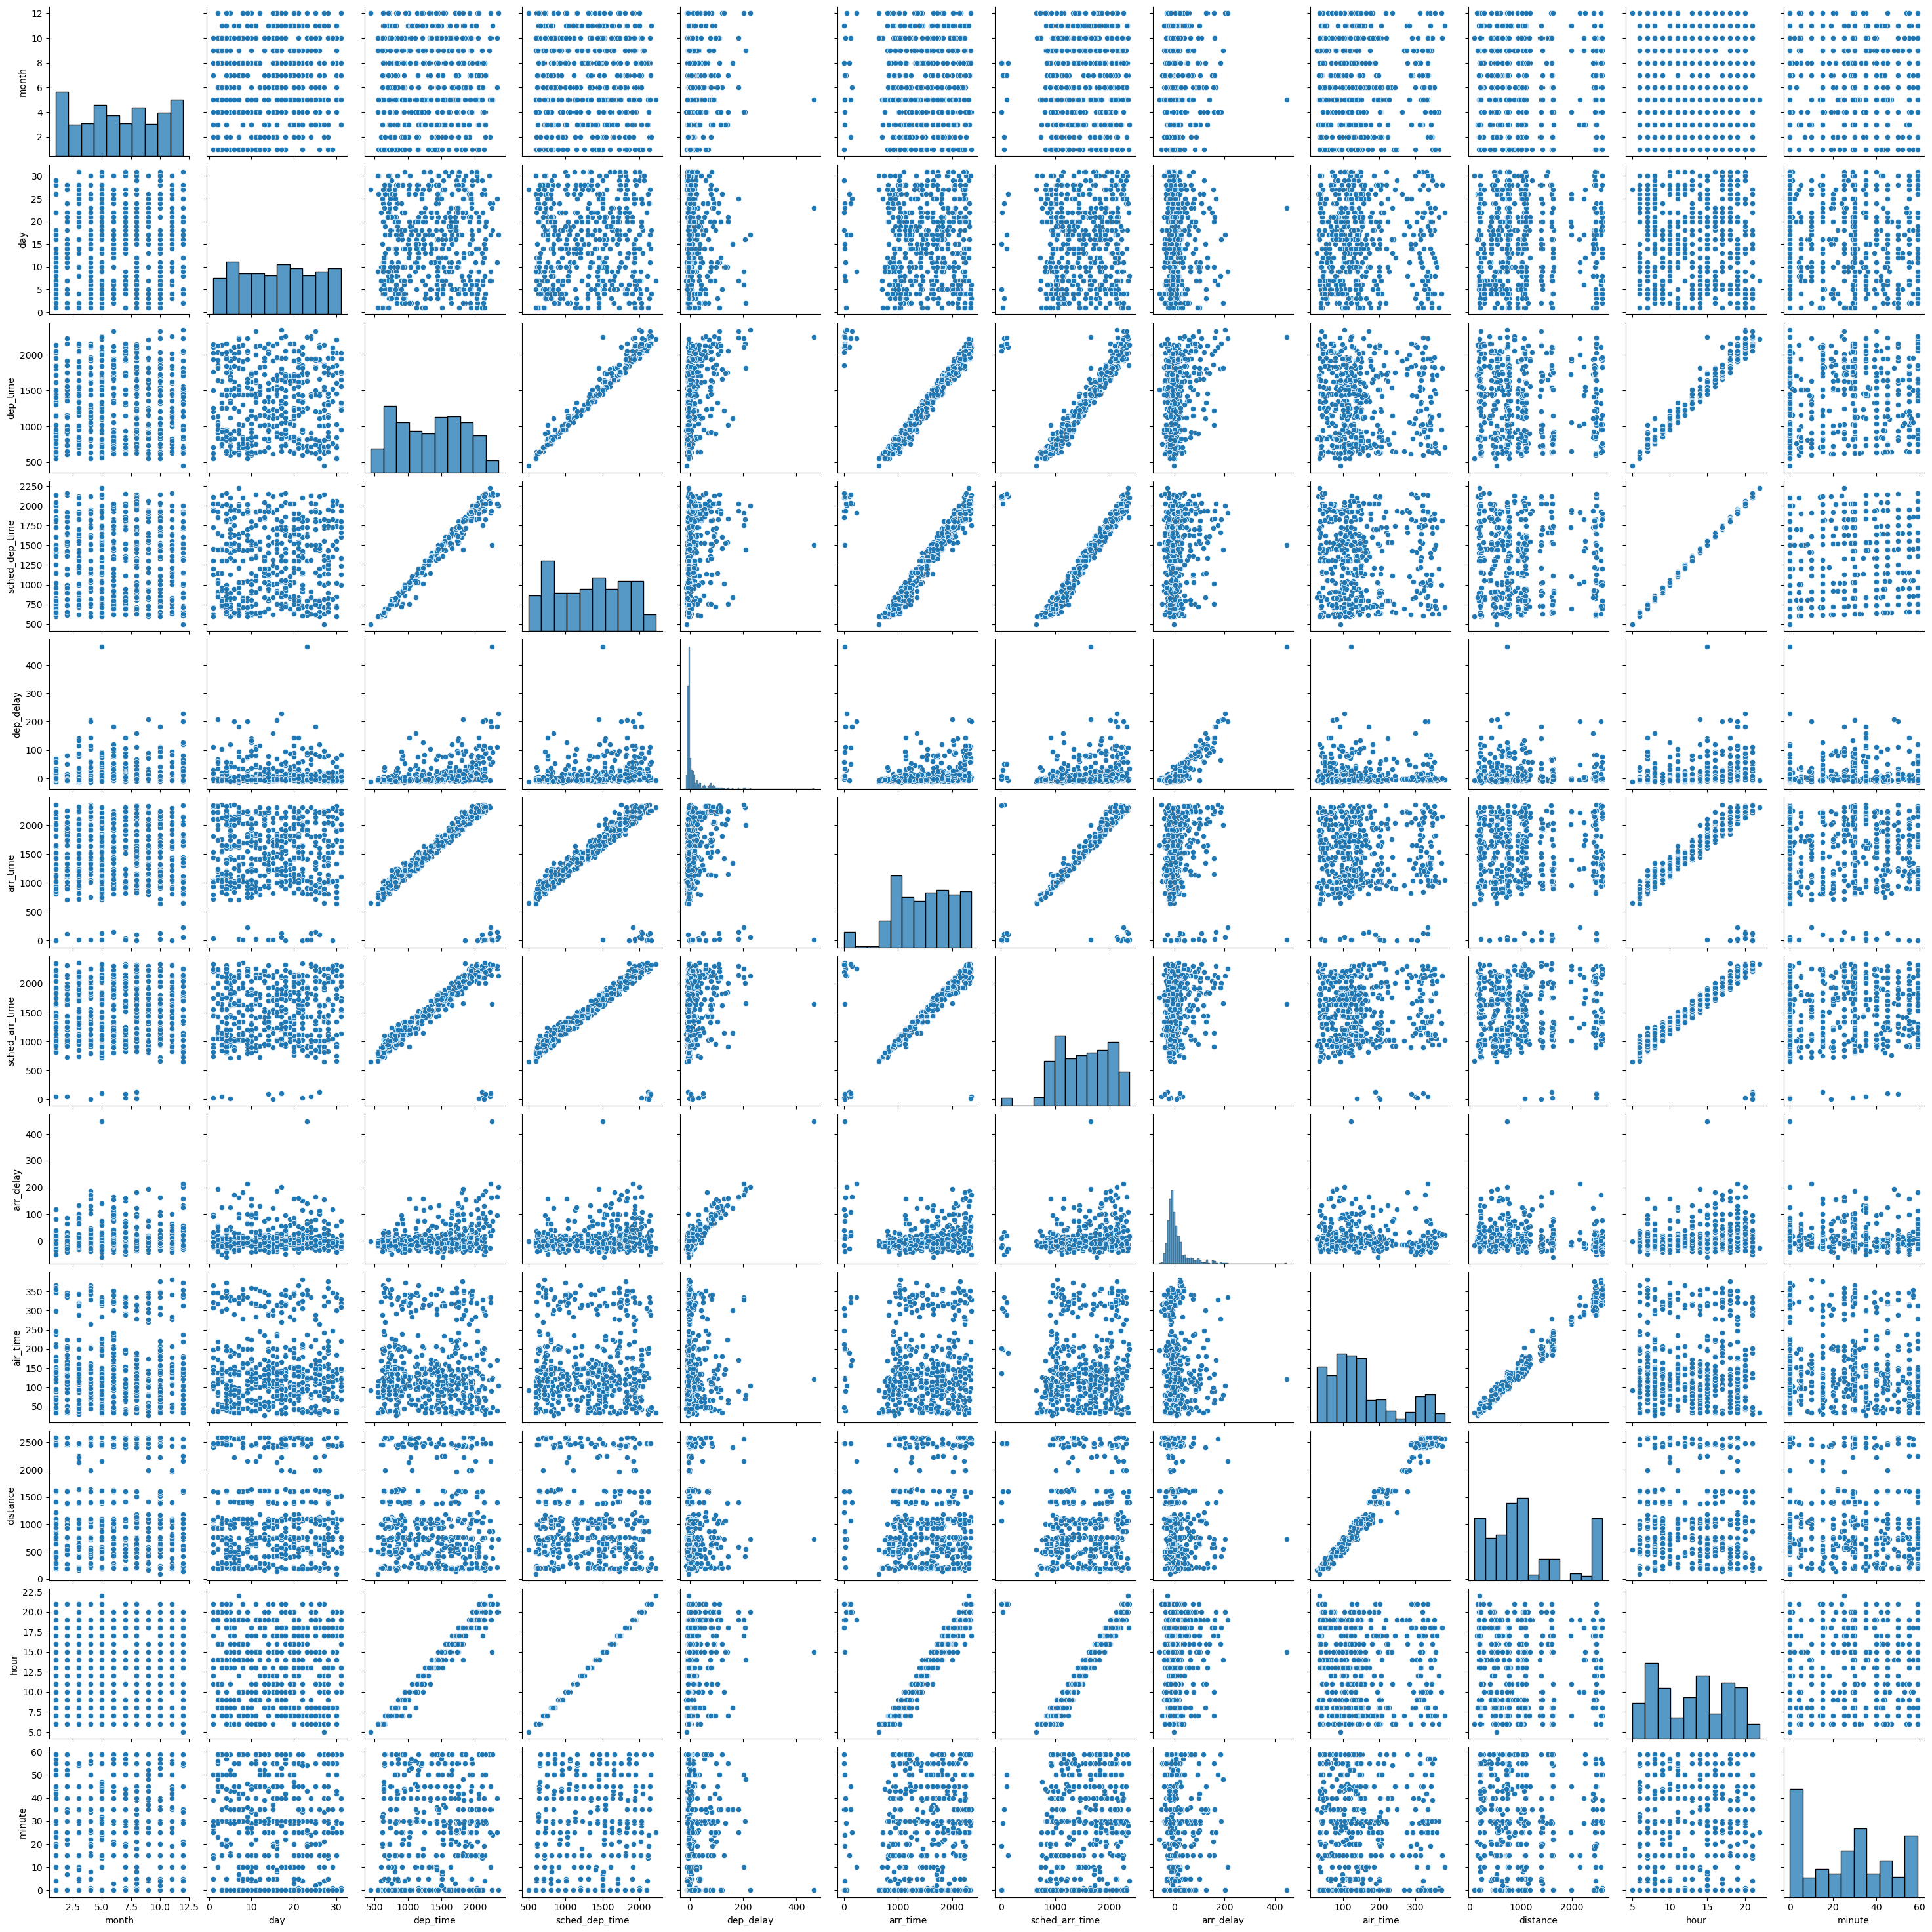

In [15]:
%%time
# The sns.pairplot() plots the relationship between any-two features. See documentation for other useful parameters.
# This can be used also for selecting which features may provide useful clusters or may be correlated.
# Note that if there are too many numberical features may be difficult to visualize. 
# Let's use a sample to first identify column pairs that we want to explore further.
sns.pairplot(df_flights.sample(n = 500));

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


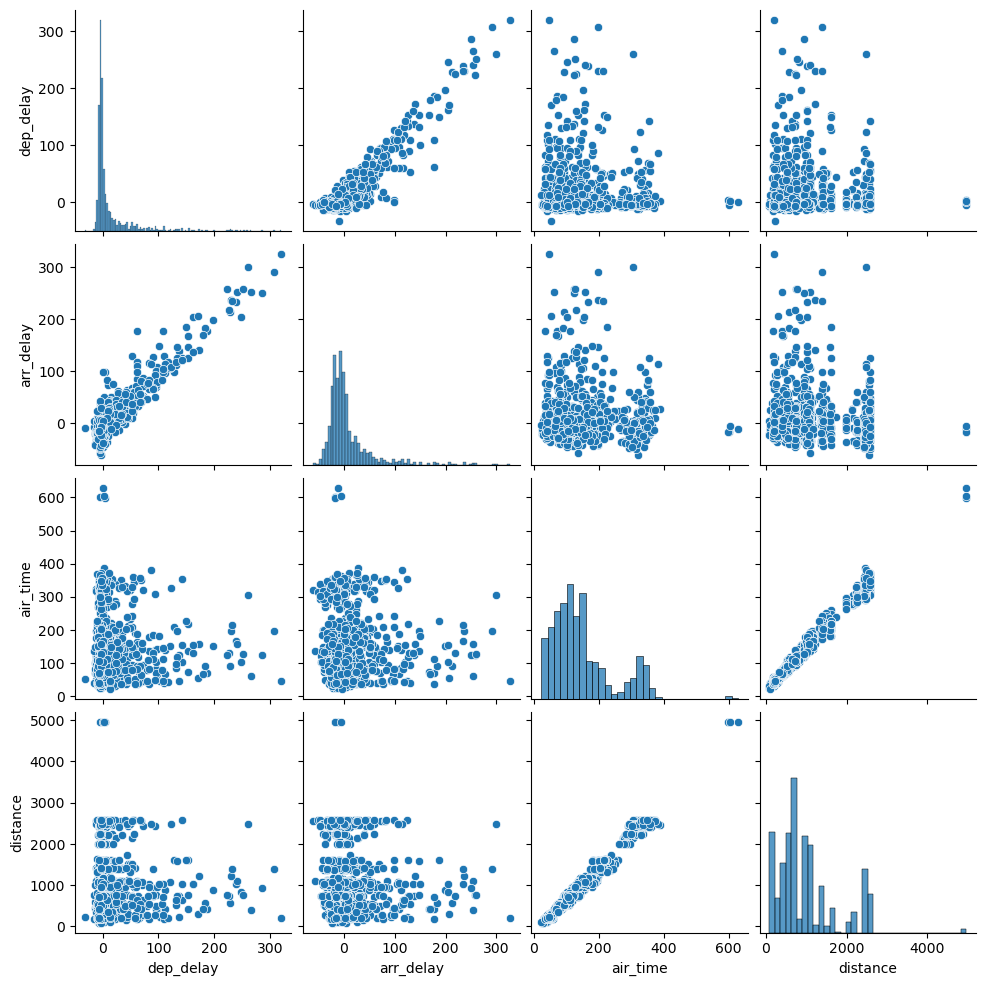

In [16]:
sns.pairplot(df_flights[['dep_delay', 'arr_delay', 'air_time', 'distance']].sample(n = 1000));

### SNS Plots
[Return to Table of Contents](#Table-of-Contents)

Once specific features that you want to plot have been identified it is a matter of selecting a library to use to create a plots and convey the message. Besides the pairplot, Seaborn (SNS) library has various plots that are very easy to use and very powerful. These include, sns.lineplot(), sns.regplot(), sns.jointplot(), sns.lmplot(), sns.residplot() among many others.

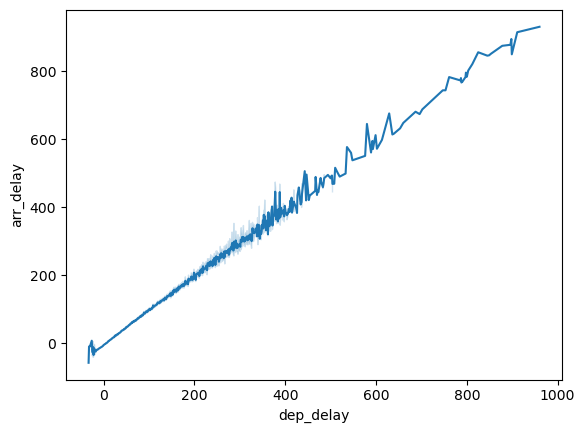

In [17]:
# SNS Lineplot
sns.lineplot(df_flights, 
             x='dep_delay', 
             y='arr_delay');

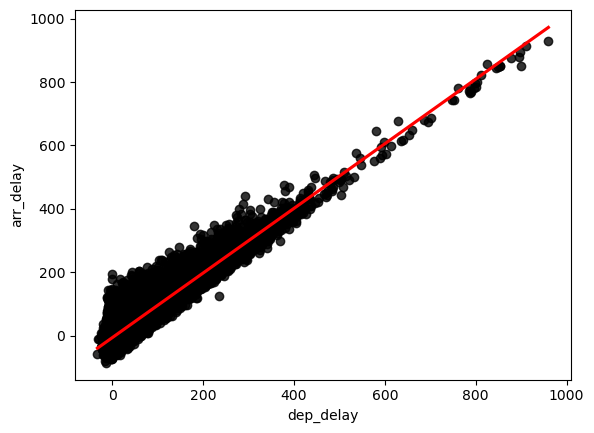

In [18]:
sns.regplot(df_flights, x='dep_delay', y='arr_delay', 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"});

### MatPlotLib Plots
[Return to Table of Contents](#Table-of-Contents)

Similarly to SNS, once the features have been identified it is matter of selecting a plot to use to convey a specific message.

In [19]:
# Numerical Data Example
# Let's assign dep_delay data and arr_delay data a variable for Example 2.1
example_2_1_dep_delay = df_flights['dep_delay']
example_2_1_arr_delay = df_flights['arr_delay']

In [20]:
# Let's explore the carrier counts with the value_counts() function 
df_carrier_count = df_flights['carrier'].value_counts(normalize = False, 
                                                      sort = True, 
                                                      ascending = False, dropna = True)\
                                        .reset_index(name = 'count').rename(columns = {'index':'carrier'})
df_carrier_count

,carrier,count
0,UA,57782
1,EV,51108
2,DL,47658
3,AA,31946
4,MQ,25034
5,US,19831
6,9E,17294
7,VX,5116
8,FL,3175


In [21]:
# Categorical Data Example
# Let's assign carrier data and count data a variable for Example 2.2
example_2_2_carrier = df_carrier_count['carrier']
example_2_2_count = df_carrier_count['count']

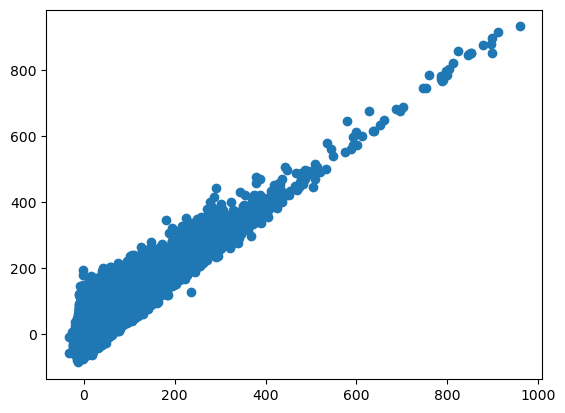

In [22]:
# To define the scatter plot I could use the variables with the data.
fig, ax = plt.subplots()
ax.scatter(x = example_2_1_dep_delay, y = example_2_1_arr_delay)
plt.show()

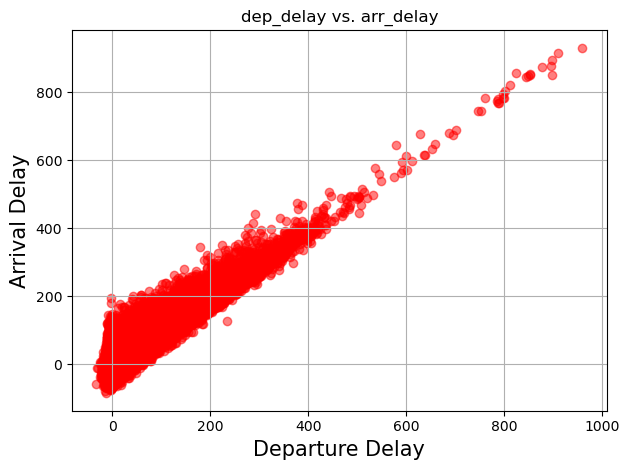

In [23]:
# Alternatively I could have alos called the data from the dataframe['feature_name']
fig, ax = plt.subplots()
ax.scatter(df_flights['dep_delay'], df_flights['arr_delay'], c='r', alpha=0.5)

ax.set_xlabel(r'Departure Delay', fontsize=15)
ax.set_ylabel(r'Arrival Delay', fontsize=15)
ax.set_title('dep_delay vs. arr_delay')

ax.grid(True)
fig.tight_layout()

plt.show();

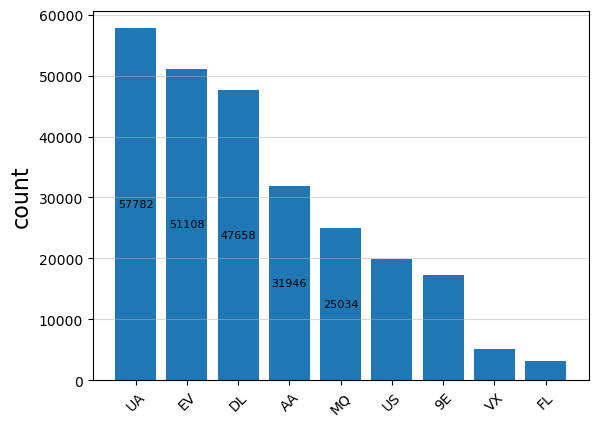

In [25]:
# In this case I use the dataframe.plot.bar and specify the columns in the x and y.
plt.bar(x = df_carrier_count['carrier'], 
            height = df_carrier_count['count'])

plt.xticks(rotation = 45)
plt.ylabel('count', size=16)
plt.grid(axis = 'y', alpha = 0.5)

# Write values inside bars
for rect in ax.patches: # .patches is everything inside of the chart (i.e., every rectangle of data)
    # Find where everything is located
    height = int(rect.get_height())
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values if needed
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 20000: # Write value on plot only when height is greater than specified value
        plt.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
plt.show();

### Pandas Plots
[Return to Table of Contents](#Table-of-Contents)

Recall that Pandas uses MatPlotLib on the backend and using the pandas Plotting functions work in the same way as the MatPlotLib with some variations.

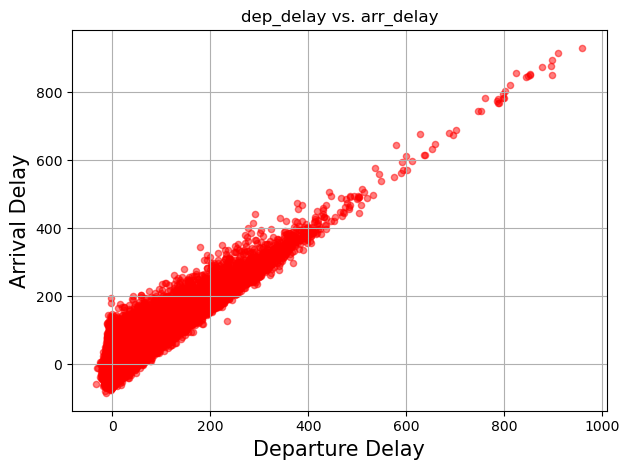

In [28]:
# Similarly to the scatter plot with MatPlotLib, the scatter plot with Pandas is defined almost the same way 
# with some variations.
ax = df_flights.plot.scatter(x='dep_delay',
                             y='arr_delay',
                             c='red', alpha=0.5)

ax.set_xlabel(r'Departure Delay', fontsize=15)
ax.set_ylabel(r'Arrival Delay', fontsize=15)
ax.set_title('dep_delay vs. arr_delay')

ax.grid(True)
plt.tight_layout()

plt.show();

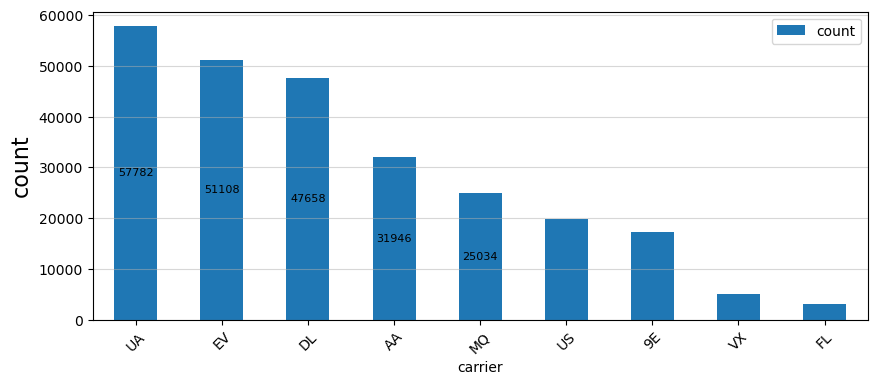

In [29]:
# In this case I use the dataframe.plot.bar and specify the columns in the x and y.
ax = df_carrier_count.plot.bar(x = 'carrier', 
                        y = 'count', 
                        stacked=True, 
                        figsize=(10, 4))
plt.xticks(rotation = 45)
plt.ylabel('count', size=16)
plt.grid(axis = 'y', alpha = 0.5)

# Write values inside bars
for rect in ax.patches: # .patches is everything inside of the chart (i.e., every rectangle of data)
    # Find where everything is located
    height = int(rect.get_height())
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values if needed
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 20000: # Write value on plot only when height is greater than specified value
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
plt.show();

# MatPlotLib: Plt.show()
[Return to Table of Contents](#Table-of-Contents)

There may be cases when you will need to use the function "plt.show();" to show multiple figures. This function, as the name implies, shows the active figure after defining all the parameters. A Jupyter Notebook cell will almsot always provide the output of the last code block that defines a figure object and the plt.show() function is not needed. However, if you have multiple datasets being drawed in one plot and you want separate plots within the same cell output you will need to use the plt.show() in the specific line.

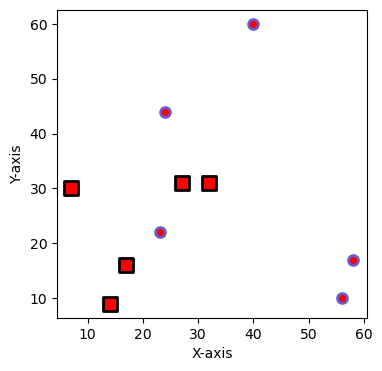

In [30]:
# Dataset-1
x1 = [58, 23, 56, 24, 40]
y1 = [17, 22, 10, 44, 60]
 
# Dataset-2
x2 = [17, 27, 14, 32, 7]
y2 = [16, 31, 9, 31, 30]

plt.figure(figsize = (4,4))
plt.scatter(x1, y1, c ="r", linewidths = 2, marker ="o", edgecolor ="slateblue", s = 50)
#plt.show() # Uncommenting this line will show two plots for each dataset instead of both datasets in one plot.
# Note that when commenting out line above that the plt.figure(figsize=(4,4)) applies to the first figure.
# And the figure labels apply to the second.

plt.scatter(x2, y2, c ="#ff0000", linewidths = 2, marker ="s", edgecolor ="black", s = 100)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show();

# MatPlotLib: Colors (Optional)
[Return to Table of Contents](#Table-of-Contents)

MatPlotLib has various colors and color maps that can be used. In matplotlib, colours can be specified in a number of ways:
BASIC COLORS
- 'b' – blue
- 'r' – red
- 'g' – green
- 'y' – yellow
- 'w' – white 
- 'k' = black

HTML Colours
- Any defined HTML colour name is a valid colour:
- "deeppink"
- "slateblue"
- "ivory"
- "lemonchiffon"

Hex code: any string of hex codes in the form of “#rrggbb” where each pair goes from 00 to ff:
- "#ffffff"
- "#000000"
- "#ff0000"
- "#ff00ff"

Documentation Refrences:
- https://matplotlib.org/stable/gallery/color/named_colors.html

# MatPlotLib: Styles (Optional)
[Return to Table of Contents](#Table-of-Contents)

MatPlotLib also allows to specify various color and format styles. The documentation reference can be found at https://matplotlib.org/stable/tutorials/introductory/customizing.html.

In [31]:
# Plt available styles.
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\felix\AppData\Local\Temp\ipykernel_11040\1021955285.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(sty)


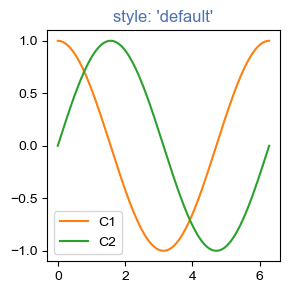

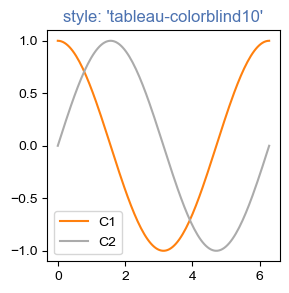

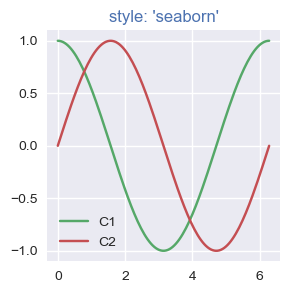

In [32]:
th_data = np.linspace(0, 2*np.pi, 128)

def plot_in_style(sty):
    plt.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title('style: {!r}'.format(sty), color='C0')

    ax.plot(th_data, np.cos(th_data), 'C1', label='C1')
    ax.plot(th_data, np.sin(th_data), 'C2', label='C2')
    ax.legend()

plot_in_style('default')
plot_in_style('tableau-colorblind10')
plot_in_style('seaborn')

# MatPlotLib: Anatomy of a Figure
[Return to Table of Contents](#Table-of-Contents)

Documentation References:
- https://matplotlib.org/stable/gallery/showcase/anatomy.html

In [33]:
# Parameters
plt.style.use('tableau-colorblind10') # Plt Style
np.random.seed(19680801) # Random seed.

def create_anatomy_figure(annotations):
    X = np.linspace(0.5, 3.5, 100) # Values of X
    Y1 = 3+np.cos(X) # Values of Y1 given X
    Y2 = 1+np.cos(1+X/0.75)/2 # Values of Y2 given X
    Y3 = np.random.uniform(Y1, Y2, len(X)) # Values of Y3 given X

    fig = plt.figure(figsize=(8, 8)) # Defining figure object and its size.
    ax = fig.add_subplot(1, 1, 1, aspect=1) # Defining subplot axes.

    def minor_tick(x, pos): # Minor ticks of the plot
        if not x % 1.0:
            return ""
        return f"{x:.2f}"

    ax.xaxis.set_major_locator(MultipleLocator(1.000)) # X-axis major tick at integers
    ax.xaxis.set_minor_locator(AutoMinorLocator(4)) # X-axis minor tick in four sections
    ax.yaxis.set_major_locator(MultipleLocator(1.000)) # Y-axis major tick at integers
    ax.yaxis.set_minor_locator(AutoMinorLocator(4)) # Y-axis minor tick in four sections.

    ax.set_xlim(0, 4) # X-axis limits (min and max values).
    ax.set_ylim(0, 4) # Y-axis limits (min and max values).

    ax.tick_params(which='major', width=1.0, length=10) # Major tick parameter 
    ax.tick_params(which='minor', width=1.0, labelsize=10, length=5, labelcolor='0.25') # Minor tick parameters

    ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10) # Grid

    ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10) # Draws Y1 line
    ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal") # Draws the Y2 line)
    ax.plot(X, Y3, linewidth=0, marker='o', markerfacecolor='w', markeredgecolor='k') # Draws Y3 scatter plot.

    ax.set_title("Anatomy of a figure (No Annotations)", fontsize=20, verticalalignment='bottom') # Titlte
    ax.set_xlabel("X axis label") # X-label title
    ax.set_ylabel("Y axis label") # Y-label title
    ax.legend(loc="upper right") # Legend
    ax.text(x = 4.0, y = -0.5, s = "Made with https://matplotlib.org", 
            fontsize=10, ha="right", color='.5') # Text bottom right.
    
    # Figure annotations
    def circle(x, y, radius=0.15): # Circle
        circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                        edgecolor='black', facecolor=(0, 0, 0, .0125),
                        path_effects=[withStroke(linewidth=5, foreground='w')])
        ax.add_artist(circle)
    # Description text.
    def text(x, y, text):
        ax.text(x, y, text, backgroundcolor="white", ha='center', va='top', weight='bold', color='blue')

    if annotations.lower() == 'yes':
        # Annotations
        # Minor tick
        circle(0.50, -0.10)
        text(0.50, -0.32, "Minor tick")
        # Minor tick
        circle(0.00, 3.50)
        text(0.00, 3.30, "Minor tick")
        # Major tick label
        circle(-0.15, 3.00)
        text(-0.15, 2.80, "Major tick and label")
        # Major tick label
        circle(3.0, -0.1)
        text(3.0, -0.3, "Major tick and label")
        # X Label
        circle(1.80, -0.27)
        text(1.80, -0.45, "X axis label")
        # Y Label
        circle(-0.27, 1.80)
        text(-0.27, 1.6, "Y axis label")
        # Title
        circle(1.60, 4.13)
        text(1.60, 3.93, "Title")
        # Blue plot
        circle(1.75, 2.80)
        text(1.75, 2.60, "Line\n(line plot)")
        # Red plot
        circle(1.20, 0.60)
        text(1.20, 0.40, "Line\n(line plot)")
        # Scatter plot
        circle(3.20, 1.75)
        text(3.20, 1.55, "Markers\n(scatter plot)")
        # Grid
        circle(3.00, 3.00)
        text(3.00, 2.80, "Grid")
        # Legend
        circle(3.70, 3.80)
        text(3.70, 3.60, "Legend")

        color = 'blue'
        
        # Using the annotate function to create text in the plot.
        ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
                    weight='bold', color=color,
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle="arc3",
                                    color=color))
        ax.annotate('', xy=(3.55, 0.0), xytext=(3.45, 0.45),
                    weight='bold', color=color,
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle="arc3",
                                    color=color))

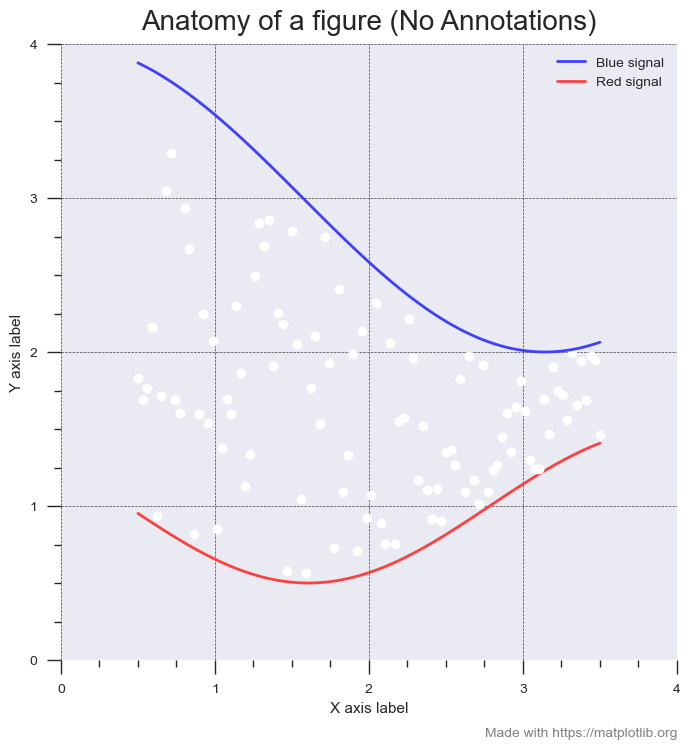

In [34]:
create_anatomy_figure(annotations = 'no')
plt.savefig("anatomy1.png", dpi=300)

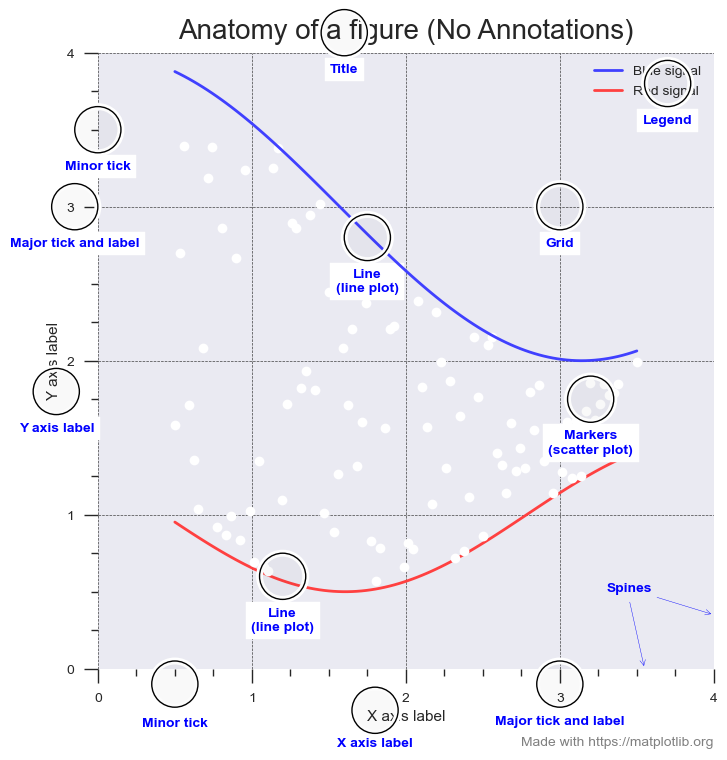

In [35]:
create_anatomy_figure(annotations = 'yes')
plt.savefig("anatomy2.png", dpi=300)

#### Variation of the Anatomy of a Figure
Note the main difference is the way of annotating text in the figure.

In [36]:
# Parameters
plt.style.use('default') # Plt Style
royal_blue = [0, 20/256, 82/256]
np.random.seed(19680801) # Random seed.

def create_anatomy_figure_2(annotations):
    X = np.linspace(0.5, 3.5, 100) # Values of X
    Y1 = 3+np.cos(X) # Values of Y1 given X
    Y2 = 1+np.cos(1+X/0.75)/2 # Values of Y2 given X
    Y3 = np.random.uniform(Y1, Y2, len(X)) # Value of Y3 given X

    fig = plt.figure(figsize=(8, 8)) # Defining figure object and its size.
    ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1) # Defining subplot axes.
    
    ax.xaxis.set_major_locator(MultipleLocator(1.000)) # X-axis major tick at integers
    ax.xaxis.set_minor_locator(AutoMinorLocator(4)) # X-axis minor tick in four sections
    ax.yaxis.set_major_locator(MultipleLocator(1.000)) # Y-axis major tick at integers
    ax.yaxis.set_minor_locator(AutoMinorLocator(4)) # Y-axis minor tick in four sections.
    ax.xaxis.set_minor_formatter("{x:.2f}")

    ax.set_xlim(0, 4) # X-axis limits (min and max values).
    ax.set_ylim(0, 4) # Y-axis limits (min and max values).

    ax.tick_params(which='major', width=1.0, length=10) # Major tick parameter 
    ax.tick_params(which='minor', width=1.0, labelsize=10, length=5, labelcolor='0.25') # Minor tick parameters

    ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10) # Grid  
    
    ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10) # Draws Y1 line
    ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal") # Draws the Y2 line)
    ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9, marker='s', 
            markerfacecolor='none', markeredgecolor='C4', markeredgewidth=2.5) # Draws Y3 scatter plot.

    ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom') # Title
    ax.set_xlabel("x Axis label", fontsize=14) # X-label text
    ax.set_ylabel("y Axis label", fontsize=14) # Y-label text
    ax.legend(loc="upper right", fontsize=14) # Legend

    if annotations.lower() == 'yes':
        # Annotate figure function
        def annotate(x, y, text, code):
            # Circle marker
            c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
                       edgecolor=royal_blue + [0.6], facecolor='none',
                       path_effects=[withStroke(linewidth=7, foreground='white')])
            ax.add_artist(c)

            # Use path_effects as a background for the texts
            # Draw the path_effects and the colored text separately so that the
            # path_effects cannot clip other texts
            for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
                color = 'white' if path_effects else royal_blue
                ax.text(x, y-0.2, text, zorder=100,
                        ha='center', va='top', weight='bold', color=color,
                        style='italic', fontfamily='Courier New',
                        path_effects=path_effects)

                color = 'white' if path_effects else 'black'
                ax.text(x, y-0.33, code, zorder=100,
                        ha='center', va='top', weight='normal', color=color,
                        fontfamily='monospace', fontsize='medium',
                        path_effects=path_effects)

        # Annotate figure
        annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
        annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
        annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
        annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
        annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
        annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
        annotate(1.52, 4.15, "Title", "ax.set_title")
        annotate(1.75, 2.80, "Line", "ax.plot")
        annotate(2.25, 1.54, "Markers", "ax.scatter")
        annotate(3.00, 3.00, "Grid", "ax.grid")
        annotate(3.60, 3.58, "Legend", "ax.legend")
        annotate(2.5, 0.55, "Axes", "fig.subplots")
        annotate(4, 4.5, "Figure", "plt.figure")
        annotate(0.65, 0.01, "x Axis", "ax.xaxis")
        annotate(0, 0.36, "y Axis", "ax.yaxis")
        annotate(4.0, 0.7, "Spine", "ax.spines")

    # Frame around figure
    fig.patch.set(linewidth=4, edgecolor='0.5')
    plt.show()

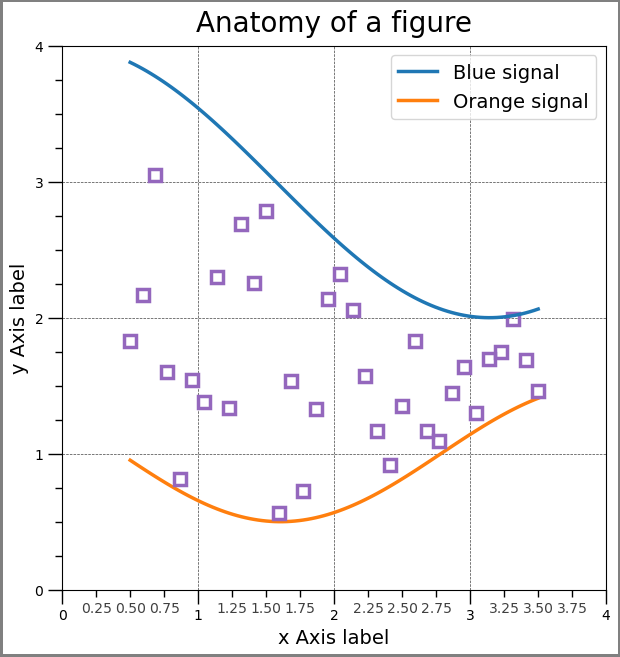

In [37]:
create_anatomy_figure_2(annotations = 'no')

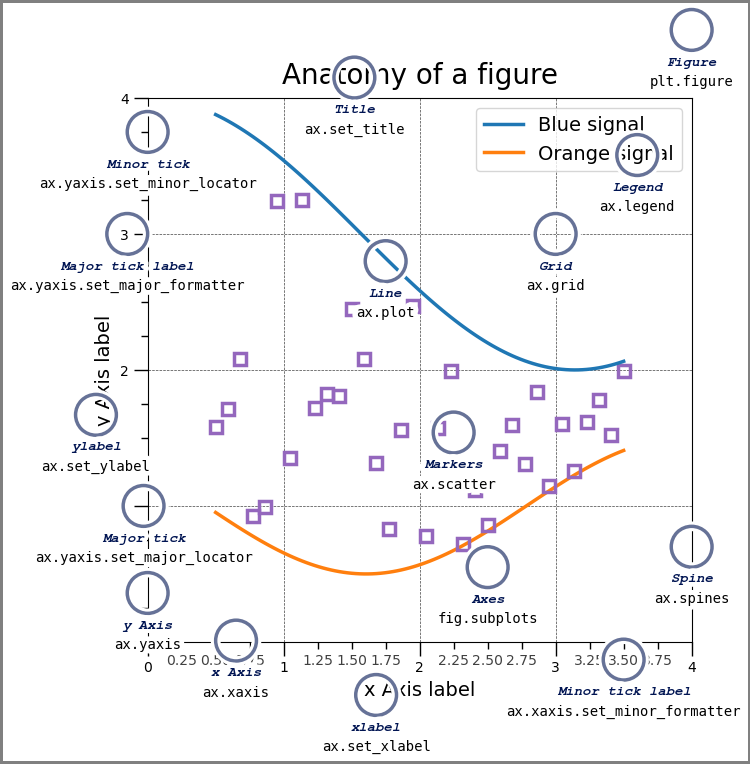

In [38]:
create_anatomy_figure_2(annotations = 'yes')

# OPTIONAL: MatPlotLib: Subplots
[Return to Table of Contents](#Table-of-Contents)

MatPlotLib has the ability to set subplots within a figure. This section discusses the plt.subplots() function and provides an overview of the different parameters to create subplots.

### MatPlotLib: Subplots: Subplots Function
[Return to Table of Contents](#Table-of-Contents)

The subplots function uses either of:
- The position of the subplot described by one of three integers, number of rows (nrows), number of columns (ncols), and plot index. The subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right. index can also be a two-tuple specifying the (first, last) indices (1-based, and including last) of the subplot, e.g., fig.add_subplot(3, 1, (1, 2)) makes a subplot that spans the upper 2/3 of the figure.

- A 3-digit integer. The digits are interpreted as if given separately as three single-digit integers, i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). Note that this can only be used if there are no more than 9 subplots.

Reference:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

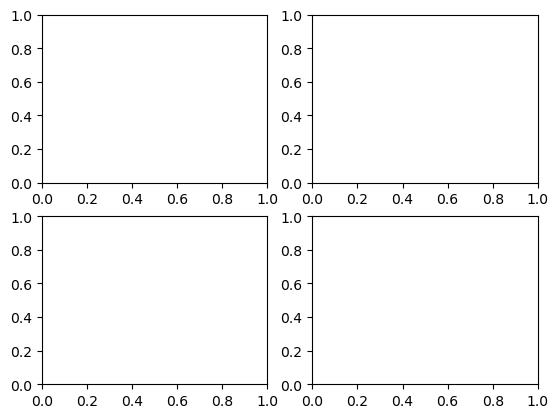

In [39]:
fig, axs = plt.subplots(2, 2)  # Figure with a 2x2 grid of Axex (i.e., 2 rows and 2 columns).
plt.show();

### MatPlotLib: Subplots: Add_suplots Function
[Return to Table of Contents](#Table-of-Contents)


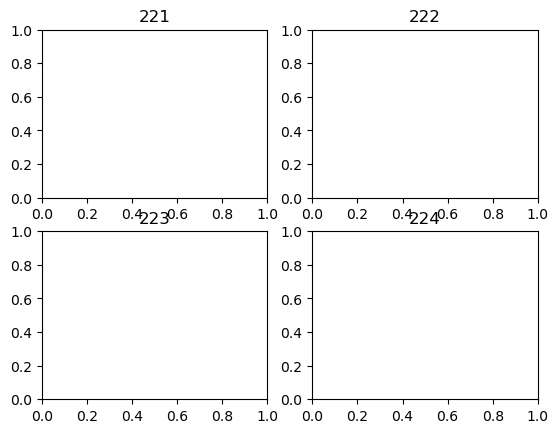

In [40]:
fig = plt.figure()

# Add subplots using the axis position.
# number of rows (nrows), number of columns (ncols), and index
fig.add_subplot(221).set_title('221')
fig.add_subplot(222).set_title('222')
fig.add_subplot(223).set_title('223')
fig.add_subplot(224).set_title('224')

plt.show();

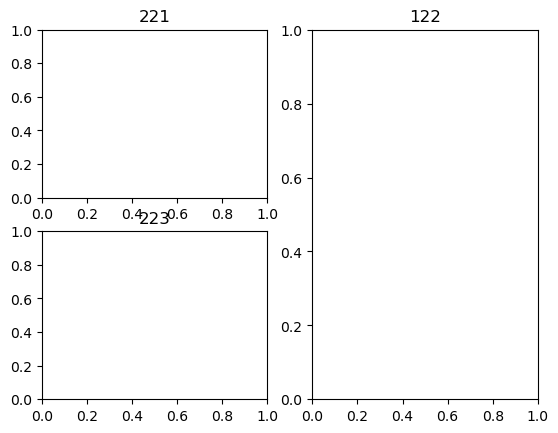

In [41]:
fig = plt.figure()

fig.add_subplot(221).set_title('221')
fig.add_subplot(122).set_title('122')
fig.add_subplot(223).set_title('223')

plt.show();

### MatPlotLib: Subplots: Subplots.mosaic Function
[Return to Table of Contents](#Table-of-Contents)


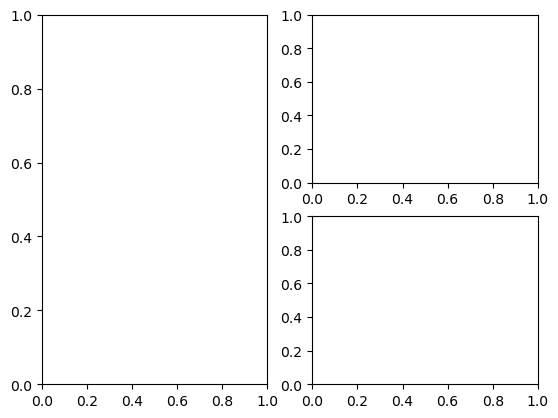

In [42]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right_bottom']])
plt.show();

### MatPlotLib: Subplots: Gridspec and Add_subplot Functions
[Return to Table of Contents](#Table-of-Contents)

References:
- https://matplotlib.org/stable/api/gridspec_api.html

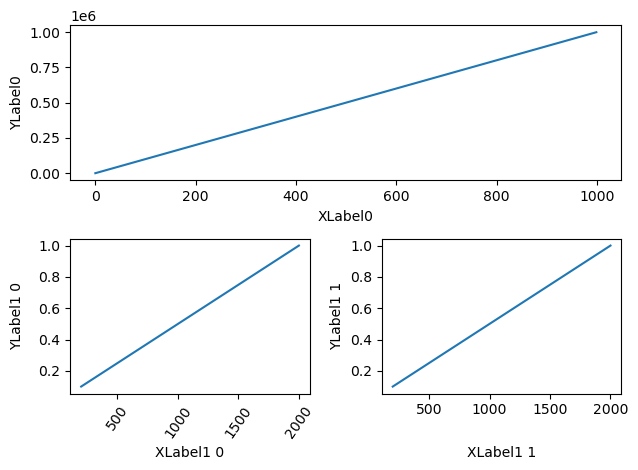

In [43]:
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        ax.tick_params(axis='x', rotation=55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()

### MatPlotLib: Subplots Examples
[Return to Table of Contents](#Table-of-Contents)

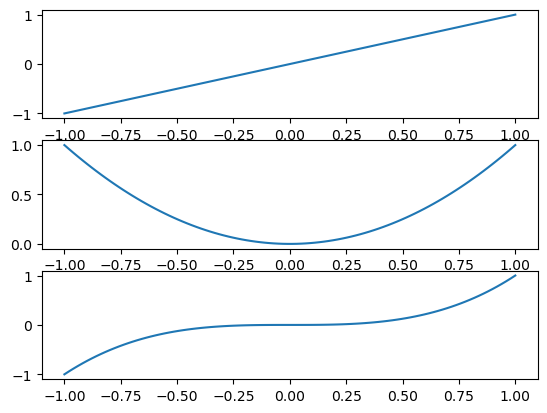

In [44]:
# 3x1 grid of plots.
plt.clf()
x = np.linspace(-1, 1, 100)
y1 = x
y2 = x**2
y3 = x**3

# Make the plots one at a time.
# number of rows (nrows), number of columns (ncols), and index
ax1 = plt.subplot(3, 1, 1)
ax1.plot(x, y1)
ax2 = plt.subplot(3, 1, 2)
ax2.plot(x, y2)
ax3 = plt.subplot(3, 1, 3)
ax3.plot(x, y3)

plt.show();

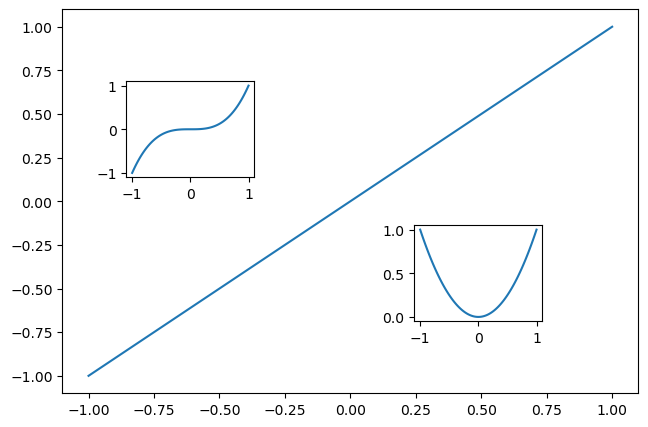

In [45]:
# Make the plots one at a time and show on top of another.
# Note: Comment out either of the plots and test.\
# plt.axes([]) are as follow
# [coordingate x, coordinate y, x-axis coordinate limit, y-axis coordinate limit]
ax1 = plt.axes([0.1, 0.1, 0.9, 0.8]) 
ax1.plot(x, y1) # Plot values
ax2 = plt.axes([0.65, 0.25, 0.2, 0.2])
ax2.plot(x, y2) # Plot values
ax3 = plt.axes([0.20, 0.55, 0.2, 0.2])
ax3.plot(x, y3) # Plot values

Text(0.5, 1.0, 'equal, looks like circle')

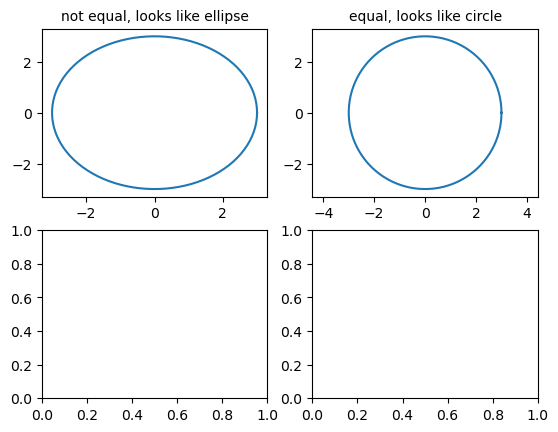

In [46]:
# DATA: Circle of radius 3.
an = np.linspace(0, 2 * np.pi, 100)
x = 3 * np.cos(an)
y = 3 * np.sin(an)

fig, axs = plt.subplots(2, 2) # 2 by 2 figure.

axs[0, 0].plot(x, y) # Plot at index row = 0, column = 0.
axs[0, 0].set_title('not equal, looks like ellipse', fontsize=10) # Title for plot at 0, 0
# Note that plot at 0,0 is using default axis.

axs[0, 1].plot(x, y) # Plot at index row = 0, column = 1
axs[0, 1].axis('equal') # Axis set at "equal"
axs[0, 1].set_title('equal, looks like circle', fontsize=10) # Title for plot at 0,1

# Plots on 1, 0 and 1, 1 are not defined.

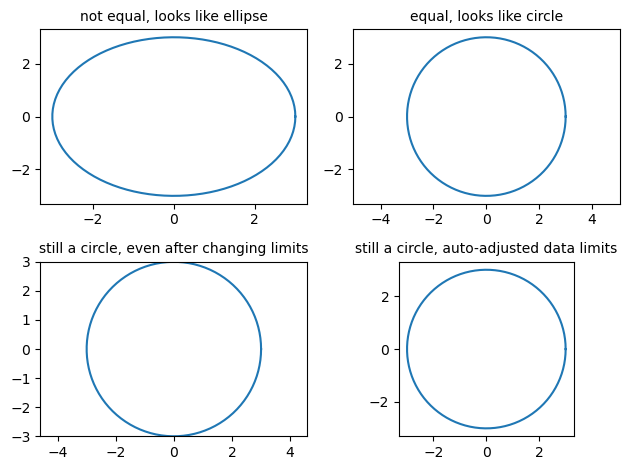

In [47]:
# DATA: circle of radius 3.
an = np.linspace(0, 2 * np.pi, 100)
x = 3 * np.cos(an)
y = 3 * np.sin(an)

# Figure and Subplots
fig, axs = plt.subplots(2, 2) # 2 by 2 figure

axs[0, 0].plot(x, y) # Plot at 0,0
axs[0, 0].set_title('not equal, looks like ellipse', fontsize=10)

axs[0, 1].plot(x, y) # Plot at 0,1
axs[0, 1].axis('equal')
axs[0, 1].set_title('equal, looks like circle', fontsize=10)

axs[1, 0].plot(x, y) # Plot at 1,0
axs[1, 0].axis('equal')
axs[1, 0].axis([-3, 3, -3, 3])
axs[1, 0].set_title('still a circle, even after changing limits', fontsize=10)

axs[1, 1].plot(x, y) # Plot at 1,1
axs[1, 1].set_aspect('equal', 'box')
axs[1, 1].set_title('still a circle, auto-adjusted data limits', fontsize=10)

fig.tight_layout()

plt.show();

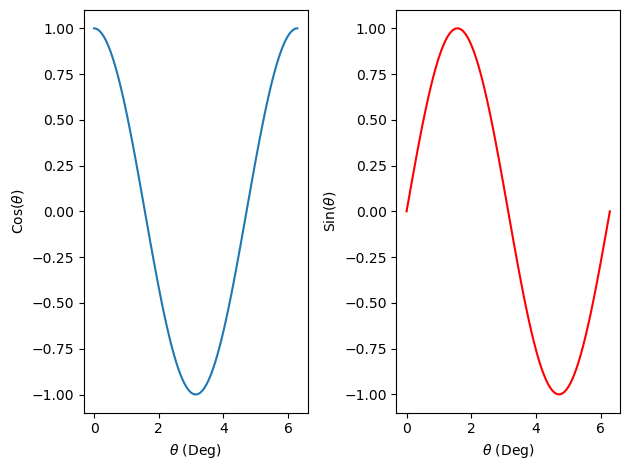

In [48]:
# DATA: Wave (e.g., sine/cosine wave)
x = np.linspace(0, 2 * np.pi, 100)
f1 = np.cos(x)
f2 = np.sin(x)

fig, axs = plt.subplots(1, 2) # Subplots with 1 row two columns

axs[0].plot(x, f1) # Plot 0,0
axs[0].set_xlabel('$\\theta$ (Deg)')
axs[0].set_ylabel('Cos($\\theta$)')

axs[1].plot(x, f2, color='r') # Plot at 0,1
axs[1].set_xlabel('$\\theta$ (Deg)')
axs[1].set_ylabel('Sin($\\theta$)')

fig.tight_layout()

plt.show();

# NOTEBOOK END.